In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 1000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 80s 5us/step


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimention = 1000):
    results = np.zeros((len(sequences),dimention))
    for i , sequence in enumerate(sequences):
        results[i, sequence] = 1.
    
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [6]:
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=256, validation_data=(x_val, y_val))



Train on 24000 samples, validate on 1000 samples
Epoch 1/4
24000/24000 [==============================] - 1s 44us/step - loss: 0.4753 - binary_accuracy: 0.7804 - val_loss: 0.3573 - val_binary_accuracy: 0.8460
Epoch 2/4
24000/24000 [==============================] - 1s 30us/step - loss: 0.3365 - binary_accuracy: 0.8596 - val_loss: 0.3269 - val_binary_accuracy: 0.8660
Epoch 3/4
24000/24000 [==============================] - 1s 24us/step - loss: 0.3166 - binary_accuracy: 0.8674 - val_loss: 0.3195 - val_binary_accuracy: 0.8660
Epoch 4/4
24000/24000 [==============================] - 0s 20us/step - loss: 0.3071 - binary_accuracy: 0.8725 - val_loss: 0.3271 - val_binary_accuracy: 0.8550


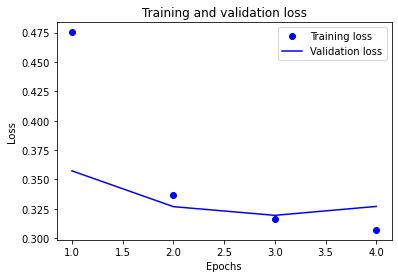

In [7]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.savefig('aaa.png')

In [8]:
print(history.history.keys())

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


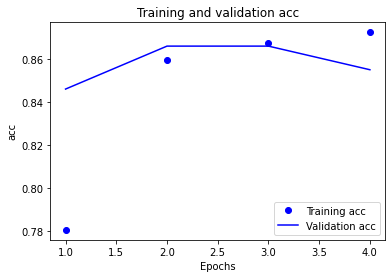

In [11]:

plt.clf()


acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

epochs = range(1, len(loss) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')

plt.legend()

plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)